In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("/Users/shashankuparwat/Desktop/Customer Segmentation and Clustering/Customer.csv")

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


df.info(

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Univariate Analysis

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

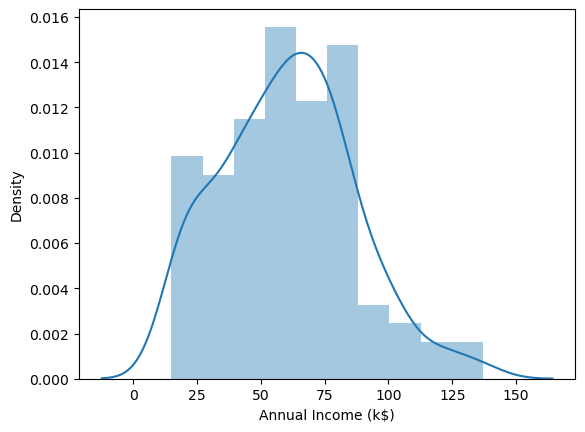

In [16]:
sns.distplot(df['Annual Income (k$)'])

In [17]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

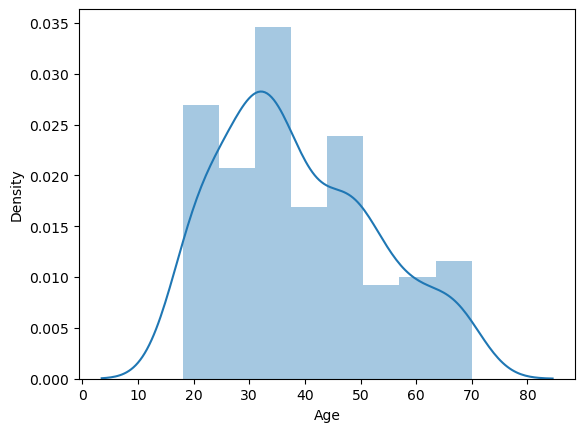

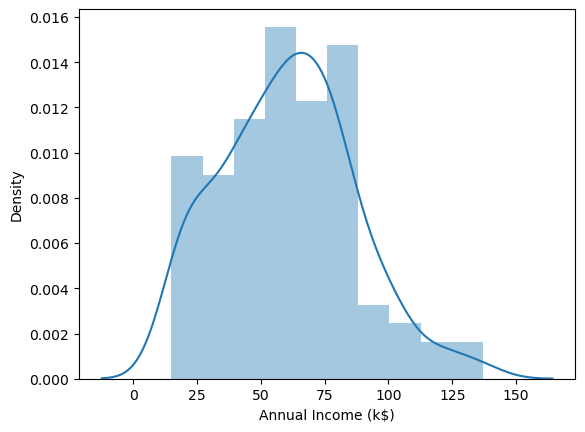

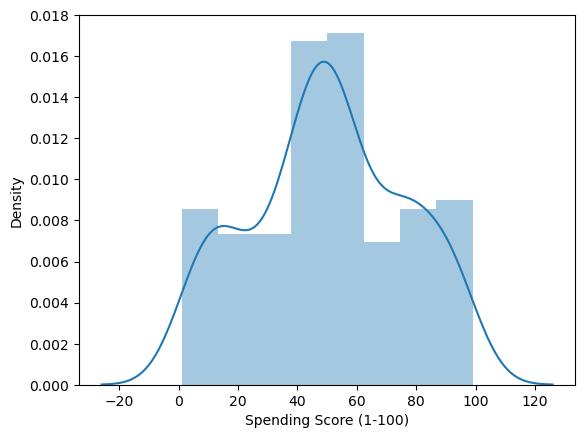

In [19]:
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

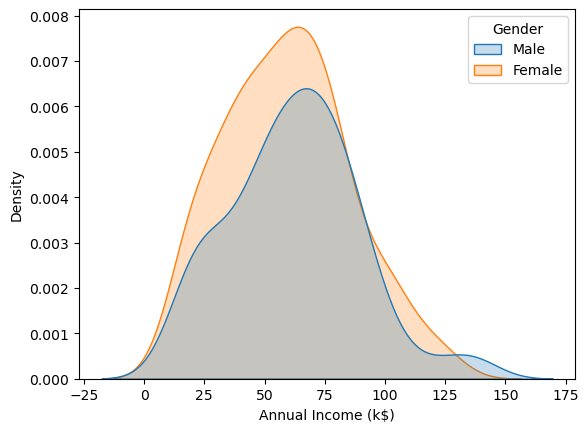

In [20]:
sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender'])

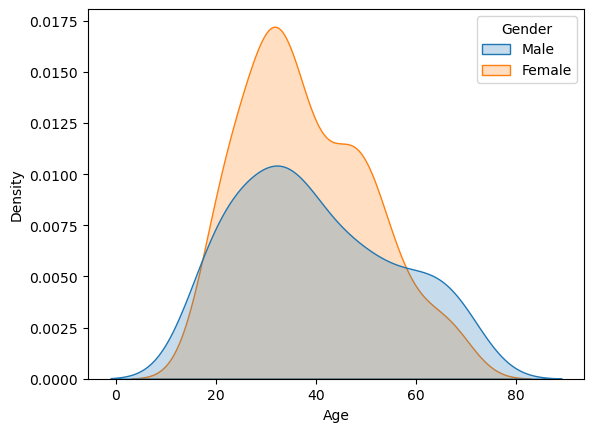

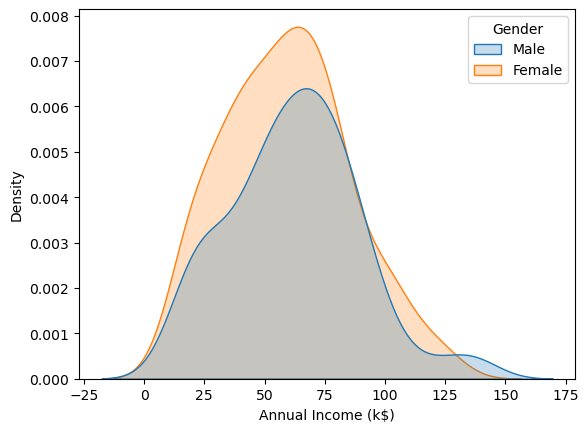

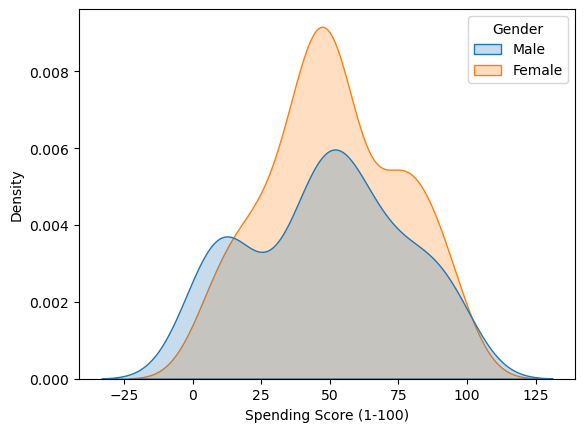

In [21]:
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.kdeplot(df[i], shade = True, hue = df['Gender'])

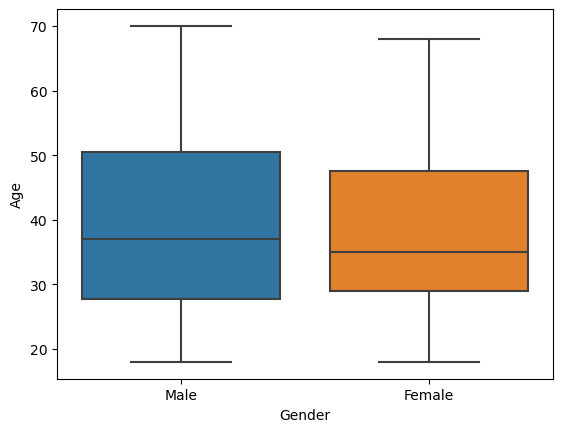

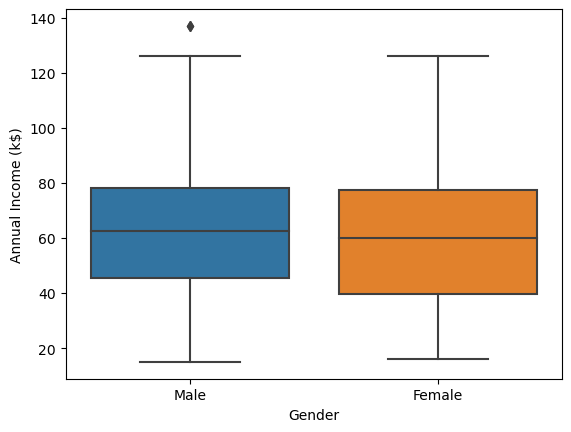

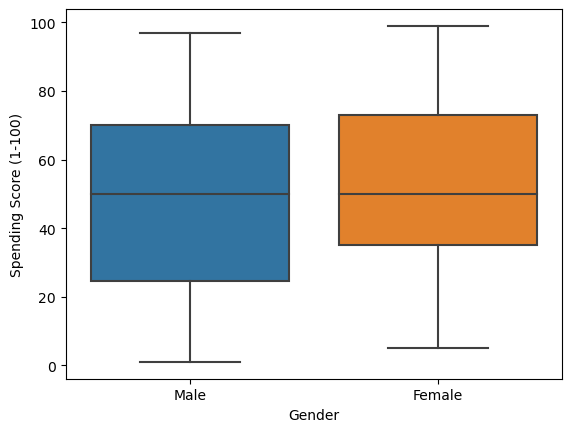

In [22]:
cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in cols:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i])

In [26]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

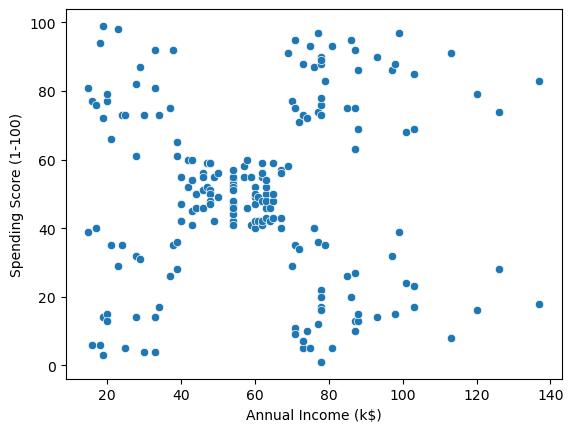

In [28]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

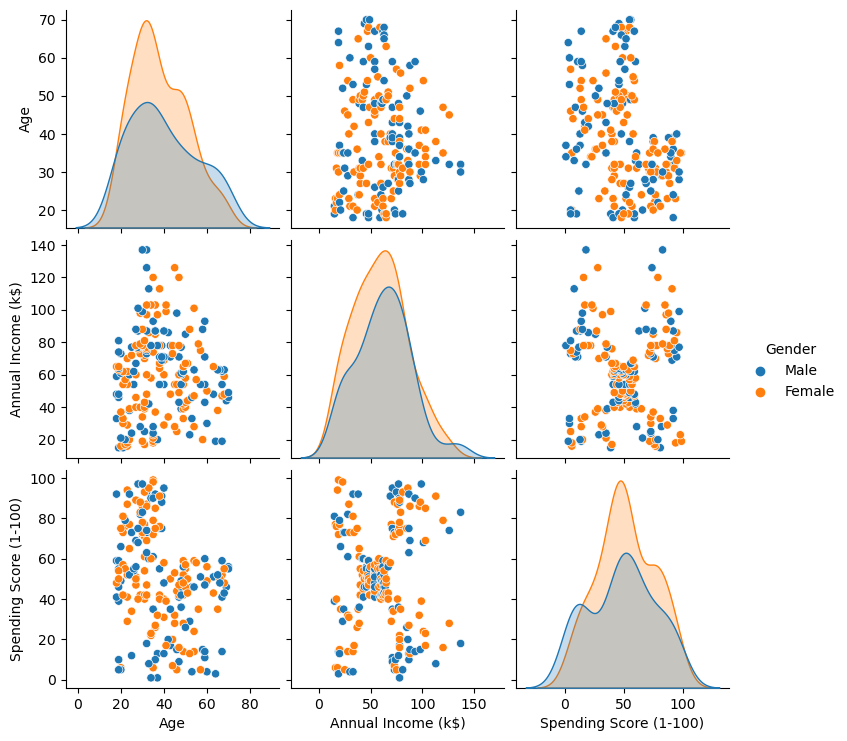

In [31]:
#df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [32]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [33]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

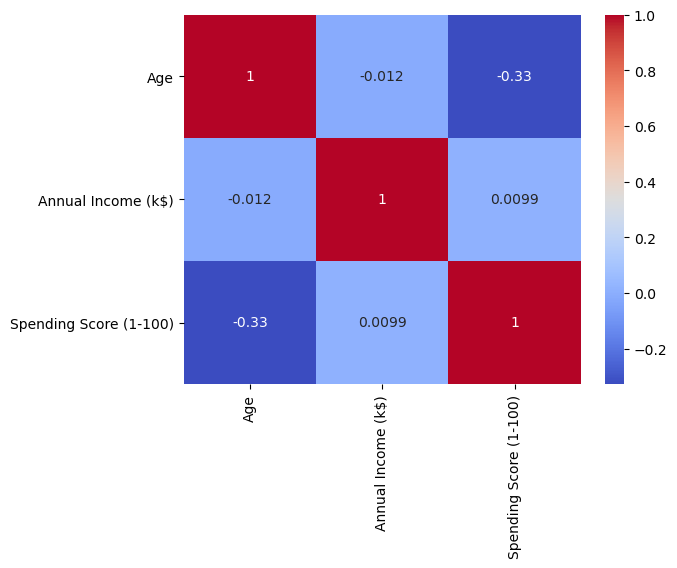

In [34]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [52]:
clustering1 = KMeans(n_clusters = 3)

In [53]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [54]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [55]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [56]:
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [57]:
clustering1.inertia_

23517.330930930933

In [58]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [59]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.484660267269,
 3949.2756132756135,
 2871.629365079366,
 2180.7817460317456,
 1837.7959893048128]

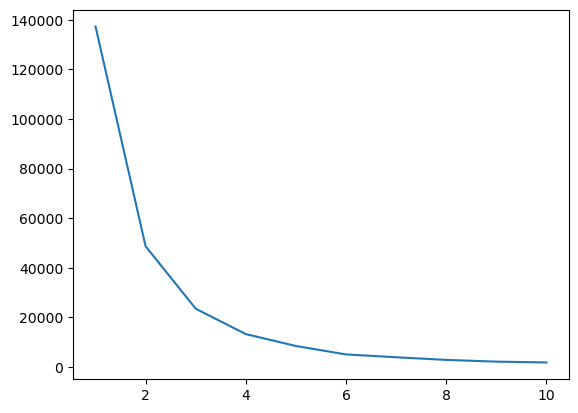

In [60]:
plt.plot(range(1, 11),inertia_scores)

In [61]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [63]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [64]:
#Bivariate Clustering

In [70]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [71]:
clustering2.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [72]:
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


In [73]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

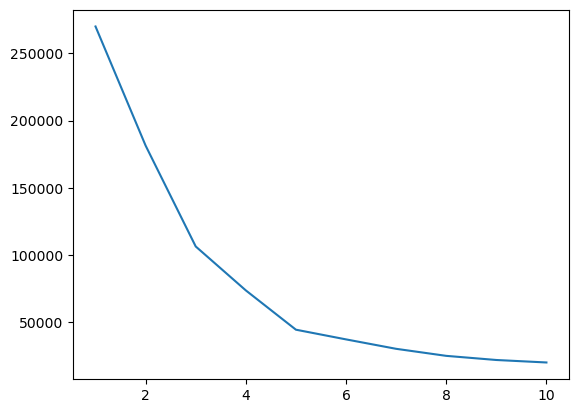

In [74]:
plt.plot(range(1, 11),inertia_scores2)

In [86]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,55.296296,49.518519


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

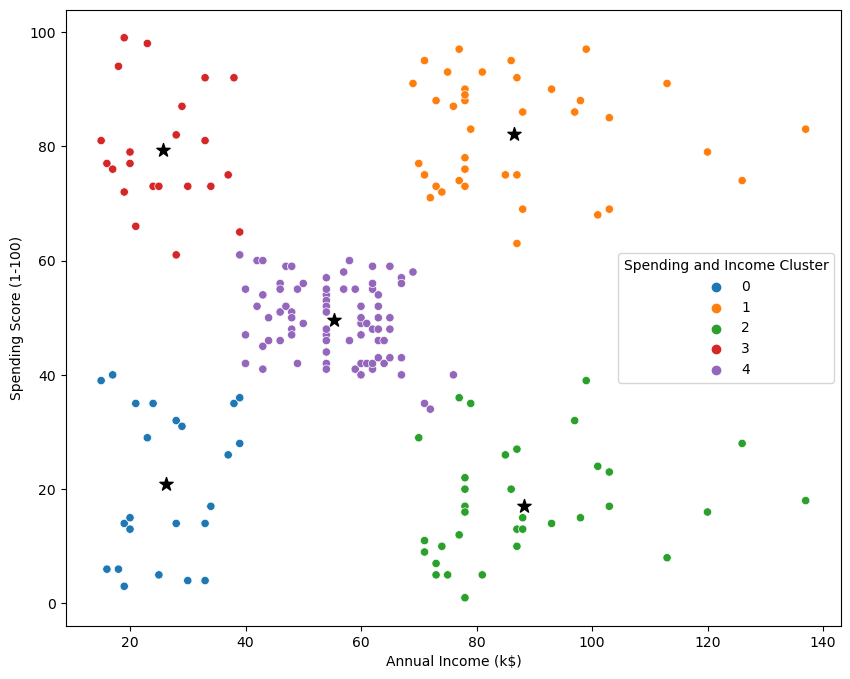

In [87]:
plt.figure(figsize = (10, 8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10') 

In [90]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [91]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


In [92]:
#Multivariate Cluster

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scale = StandardScaler()

In [95]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


In [98]:
dff = pd.get_dummies(df, drop_first = True)

In [99]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,0,1
1,21,15,81,0,3,1
2,20,16,6,0,0,0
3,23,16,77,0,3,0
4,31,17,40,0,0,0


In [100]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [101]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [103]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [108]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [109]:
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [117]:
inertia_scores3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

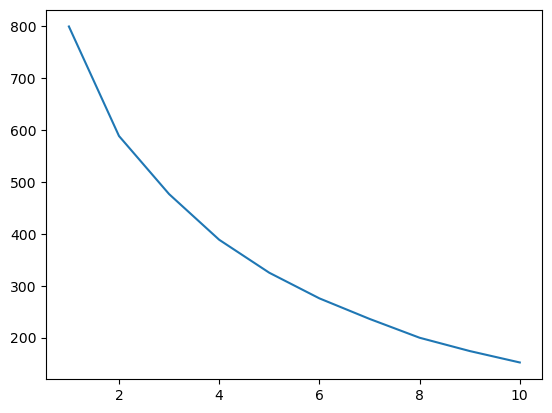

In [118]:
plt.plot(range(1, 11), inertia_scores3)

# Analysis

## Target Cluster

#### - Target group would be cluster 1 which has a high Spending Score and high income 

#### - 54 % of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster 

#### - Cluster 3 presents an interesting opportunity to market to the customers for sales event on popular items.